# Dataset : 

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("D:\ML_Project\data\diabetes.csv")

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\darzu\AppData\Local\Temp\ipykernel_11628\578368161.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\ML_Project\data\diabetes.csv")


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print("Shape:", df.shape)

Shape: (768, 9)


In [10]:
print("\nColumns:", list(df.columns))


Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
print("Descriptive stats (numeric):")
print(df.describe().T)

Descriptive stats (numeric):
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.00

In [9]:
target_col = "Outcome"
X = df.drop(columns=[target_col])
y = df[target_col]

In [10]:
print("\nClass distribution (counts):")
print(y.value_counts())


Class distribution (counts):
Outcome
0    500
1    268
Name: count, dtype: int64


In [11]:
zero_counts = (X == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [12]:
print(zero_counts[zero_counts > 0].sort_values(ascending=False))

Insulin          374
SkinThickness    227
Pregnancies      111
BloodPressure     35
BMI               11
Glucose            5
dtype: int64


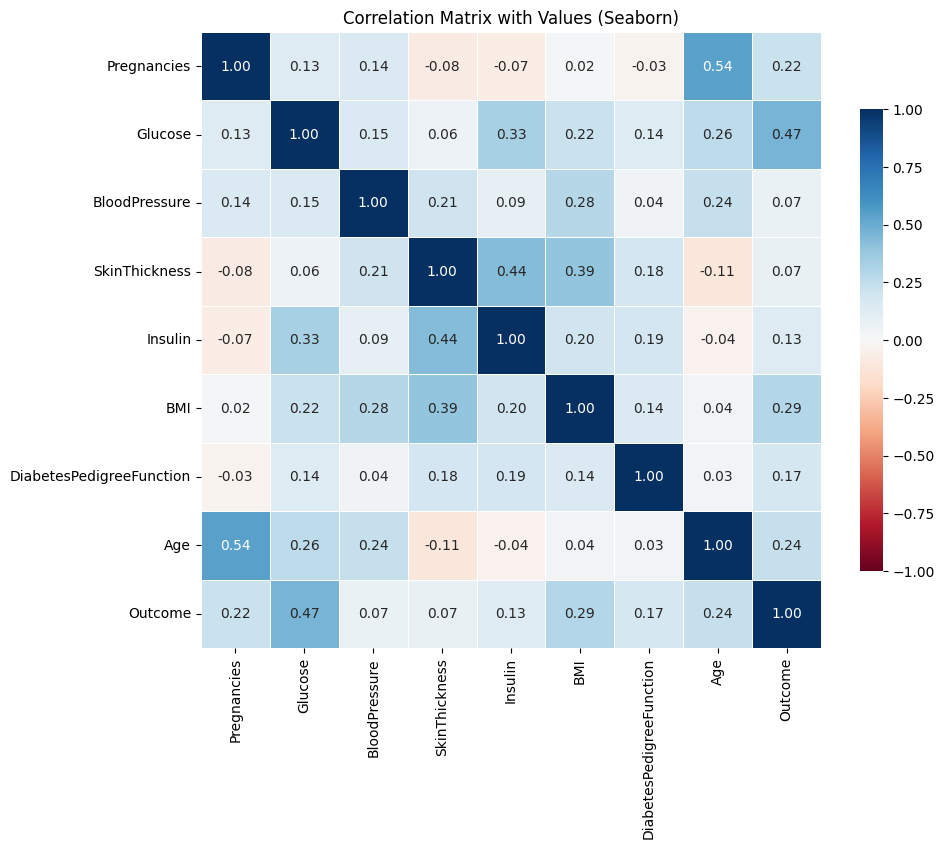

In [13]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, annot=True, cmap='RdBu',fmt=".2f",vmin=-1,vmax=1,
    center=0,linewidths=.5,cbar_kws={"shrink": .75}
)
plt.title("Correlation Matrix with Values (Seaborn)")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [16]:
# case 1 with stratify
# 500 - 0, 90% of 500 --> 450(train), 50 is for left test
# 300 - 1, 90% of 300 --> 270(train), 30 is for left test


# # Case 2 with random
# 500 - 0, 490(train), 10 is for left test
# 300 - 1, 100(train), 200 is for left test



In [21]:
print(f"After split -> X_train: {X_train.shape}, X_test: {X_test.shape}")

After split -> X_train: (691, 8), X_test: (77, 8)


In [24]:
# Step 1 : do the imputation
columns_with_zero = ["Insulin", "SkinThickness", "BloodPressure", "BMI", "Glucose"]

zero_missing_cols = [c for c in columns_with_zero if c in X_train.columns]
print("Columns with 0 for (treating 0 values as missing):", zero_missing_cols)

Columns with 0 for (treating 0 values as missing): ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'Glucose']


In [25]:
# Step 2 : scaling
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
remaining_cols = [c for c in numeric_cols]
print(remaining_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.compose import ColumnTransformer

In [29]:
transformers = []

if zero_missing_cols:
    impute_then_scale = SklearnPipeline([
        ("imputer_zero_as_missing", SimpleImputer(missing_values=0, strategy="median")),
        ("scaler", StandardScaler())
    ])
    transformers.append(("impute_scale", impute_then_scale, zero_missing_cols))

    # numerical colms & not part of imputation
    remaining_after_impute = [c for c in remaining_cols if c not in zero_missing_cols]
    if remaining_after_impute:
        transformers.append(("scaler_all", SklearnPipeline([("scaler", StandardScaler())]), remaining_after_impute))

else :
    transformers.append(("scaler_all", SklearnPipeline([("scaler", StandardScaler())]), remaining_cols))


In [30]:
preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")
# remainder="drop" specifies what should happend to any columns in our dataset that 
# were not explicitly included in any of transformers we defined

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

In [34]:
pipeline = SklearnPipeline([("preprocessor", preprocessor), ("clf", clf)])

In [35]:
pipeline.fit(X_train, y_train)
# preprocessor.fit(X_train)
# preprocessor.transform(X_train)
print("Pipeline fitted to training data.")

Pipeline fitted to training data.


In [ ]:
# si = SimpleImputer(missing_values=0, strategy="median")
# ss = StandardScaler()
# clf = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

# si = si.fit(X_train)
# X_train = si.transform(X_train)

# ss = ss.fit(X_train)
# X_train = ss.transform(X_train)

# clf.fit(X_train, y_train)
# y_train_pred = clf.predict(X_train)

In [36]:
# Predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [37]:
y_train_pred, y_test_pred

(array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [38]:
y_train_proba = pipeline.predict_proba(X_train)[:, 1]
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

In [39]:
y_test_proba

array([0.04721374, 0.68668817, 0.75705139, 0.33971428, 0.11498046,
       0.35770544, 0.73039418, 0.75437203, 0.32052954, 0.52344462,
       0.13301008, 0.30176517, 0.1818103 , 0.02025017, 0.10254376,
       0.92698275, 0.0666113 , 0.85305959, 0.228667  , 0.06831238,
       0.07585059, 0.12312407, 0.03894502, 0.1737577 , 0.05204015,
       0.04980449, 0.25920155, 0.25054662, 0.01219118, 0.22687001,
       0.60794932, 0.69742259, 0.32280258, 0.15538786, 0.99310091,
       0.01825225, 0.62100981, 0.73792066, 0.04353641, 0.10079687,
       0.22273127, 0.62261182, 0.78242913, 0.1373816 , 0.04013881,
       0.74193777, 0.28603531, 0.86796411, 0.83885323, 0.23018755,
       0.46741402, 0.54028546, 0.65639974, 0.32445704, 0.34411965,
       0.94797985, 0.69611076, 0.07319184, 0.32433003, 0.09164704,
       0.08539208, 0.37905441, 0.06673788, 0.64706039, 0.86504006,
       0.0521913 , 0.64944145, 0.44327139, 0.5444432 , 0.67430091,
       0.05907097, 0.33338938, 0.45129182, 0.06445816, 0.26116

In [40]:
(y_test_proba >= 0.9).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
255,1,113,64,35,0,33.6,0.543,21
125,1,88,30,42,99,55.0,0.496,26
46,1,146,56,0,0,29.7,0.564,29
312,2,155,74,17,96,26.6,0.433,27
519,6,129,90,7,326,19.6,0.582,60


In [42]:
train_results = X_train.copy()
train_results['Actual'] = y_train.values
train_results['Predicted'] = y_train_pred
train_results['Predicted_Prob'] = y_train_proba

In [43]:
test_results = X_test.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_test_pred
test_results['Predicted_Prob'] = y_test_proba

In [44]:
print("TRAIN RESULTS:")
train_results.head()

TRAIN RESULTS:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual,Predicted,Predicted_Prob
255,1,113,64,35,0,33.6,0.543,21,1,0,0.197638
125,1,88,30,42,99,55.0,0.496,26,1,1,0.512858
46,1,146,56,0,0,29.7,0.564,29,0,0,0.407504
312,2,155,74,17,96,26.6,0.433,27,1,0,0.371109
519,6,129,90,7,326,19.6,0.582,60,0,0,0.212198


In [45]:
print("TEST RESULTS:")
test_results.head()

TEST RESULTS:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual,Predicted,Predicted_Prob
158,2,88,74,19,53,29.0,0.229,22,0,0,0.047214
484,0,145,0,0,0,44.2,0.630,31,1,1,0.686688
712,10,129,62,36,0,41.2,0.441,38,1,1,0.757051
535,4,132,0,0,0,32.9,0.302,23,1,0,0.339714
205,5,111,72,28,0,23.9,0.407,27,0,0,0.114980


In [47]:
test_results[test_results['Actual'] != test_results['Predicted']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual,Predicted,Predicted_Prob
535,4,132,0,0,0,32.9,0.302,23,1,0,0.339714
517,7,125,86,0,0,37.6,0.304,51,0,1,0.523445
17,7,107,74,0,0,29.6,0.254,31,1,0,0.181810
366,6,124,72,0,0,27.6,0.368,29,1,0,0.250547
44,7,159,64,0,0,27.4,0.294,40,0,1,0.607949
699,4,118,70,0,0,44.5,0.904,26,0,1,0.621010
558,11,103,68,40,0,46.2,0.126,42,0,1,0.622612
258,1,193,50,16,375,25.9,0.655,24,0,1,0.741938
264,4,123,62,0,0,32.0,0.226,35,1,0,0.286035
469,6,154,78,41,140,46.1,0.571,27,0,1,0.867964


In [49]:
test_results[test_results['Actual'] != test_results['Predicted']].shape

(21, 11)

In [50]:
# 0 --> 0, 1
# 1 --> 0, 1

test_results.groupby(['Actual', 'Predicted']).size()

Actual  Predicted
0       0            40
        1            10
1       0            11
        1            16
dtype: int64

In [51]:
10 + 11

21

In [52]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, confusion_matrix, classification_report
)

In [55]:
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "confusion_matrix": confusion_matrix(y_true, y_pred),
        "classification_report": classification_report(y_true, y_pred, output_dict=True)
    }

In [59]:
metrics_train = compute_metrics(y_train, y_train_pred)
for k,v in metrics_train.items():
    if k not in ("confusion_matrix", "classification_report"):
        print(f"  {k}: {v:.4f}")

  accuracy: 0.7800
  precision: 0.7380
  recall: 0.5726
  f1: 0.6449


In [61]:
metrics_test = compute_metrics(y_test, y_test_pred)
print("TEST metrics:")
for k,v in metrics_test.items():
    if k not in ("confusion_matrix", "classification_report"):
        print(f"  {k}: {v:.4f}")

TEST metrics:
  accuracy: 0.7273
  precision: 0.6154
  recall: 0.5926
  f1: 0.6038


In [62]:
train_cr = pd.DataFrame(metrics_train["classification_report"]).T
print("Train classification report:\n", train_cr)

Train classification report:
               precision    recall  f1-score     support
0              0.795635  0.891111  0.840671  450.000000
1              0.737968  0.572614  0.644860  241.000000
accuracy       0.780029  0.780029  0.780029    0.780029
macro avg      0.766801  0.731863  0.742765  691.000000
weighted avg   0.775522  0.780029  0.772378  691.000000


In [63]:
test_cr = pd.DataFrame(metrics_test["classification_report"]).T
print("Test classification report:\n", test_cr)

Test classification report:
               precision    recall  f1-score    support
0              0.784314  0.800000  0.792079  50.000000
1              0.615385  0.592593  0.603774  27.000000
accuracy       0.727273  0.727273  0.727273   0.727273
macro avg      0.699849  0.696296  0.697926  77.000000
weighted avg   0.725079  0.727273  0.726050  77.000000


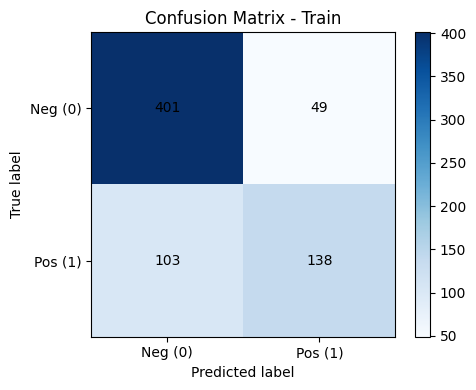

In [64]:
# Confusion matrices
cm_train = metrics_train["confusion_matrix"]
plt.figure(figsize=(5,4))
plt.imshow(cm_train, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix - Train")
plt.colorbar()
plt.xticks([0,1], ["Neg (0)", "Pos (1)"])
plt.yticks([0,1], ["Neg (0)", "Pos (1)"])
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, cm_train[i,j], ha="center", va="center")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

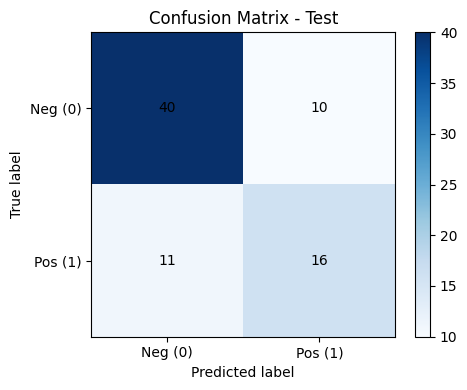

In [65]:
cm_test = metrics_test["confusion_matrix"]
plt.figure(figsize=(5,4))
plt.imshow(cm_test, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.colorbar()
plt.xticks([0,1], ["Neg (0)", "Pos (1)"])
plt.yticks([0,1], ["Neg (0)", "Pos (1)"])
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, cm_test[i,j], ha="center", va="center")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [66]:
import joblib

In [67]:
output_path = "logistic_pipeline.pkl"
joblib.dump(pipeline, output_path)
print(f"\nSaved pipeline to: {output_path}")


Saved pipeline to: logistic_pipeline.pkl


In [68]:
pipeline

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_scale', ...), ('scaler_all', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
pipeline['clf'].coef_

array([[-0.0013678 ,  0.00849131, -0.11117206,  0.64170799,  1.11761071,
         0.40933862,  0.28269061,  0.13917814]])

In [71]:
pipeline['clf'].coef_.flatten()

array([-0.0013678 ,  0.00849131, -0.11117206,  0.64170799,  1.11761071,
        0.40933862,  0.28269061,  0.13917814])

In [70]:
pipeline['clf'].intercept_

array([-0.84612488])